# Latent Semantic Analysis

You are given the following documents and queries

* $d1$ : Romeo and Juliet.
* $d2$ : Juliet: O happy dagger!
* $d3$ : Romeo died by dagger.
* $d4$ : "Live free or die", that's the motto of New-Hampshire
* $d5$ : Did you know, New-Hampshire is in New-England

* Query : dies and dagger

In [51]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# You need an ordered dictionary in order to convert each documents to matrix
from collections import OrderedDict

# Corpus (단어 전체 셋)을 생성
corpus = OrderedDict(
    {'romeo': 0, 'juliet': 1, 'happy': 2, 'dagger': 3, 'live': 4, 'die': 5, 'free': 6, 'new-hampshire': 7}
)

In [3]:
d1 = 'Romeo and Juliet.'
d2 = 'Juliet: O happy dagger!'
d3 = 'Romeo die by dagger.' #you technically need to use died, but just use present tense this case
d4 = "'Live free or die', that's the motto of New-Hampshire"
d5 = 'Did you know, New-Hampshire is in New-England'

docs = [d1, d2, d3, d4, d5]

display(docs)

['Romeo and Juliet.',
 'Juliet: O happy dagger!',
 'Romeo die by dagger.',
 "'Live free or die', that's the motto of New-Hampshire",
 'Did you know, New-Hampshire is in New-England']

## 1. Create Document-Word Matrix

### 1.1 Preprocessing (you can also use Konlpy for Python)

In [6]:
# create a function
import re

def parse_document(doc):
    tokens = doc.split(' ') #split by empty space
    tokens = map(str.lower, tokens) #lowercase every word
    tokens = list(tokens) #list the words
    tokens = [re.sub(r'[^a-zA-Z0-9-]', '', token) for token in tokens] #use regex to only include words
    
    return tokens

In [7]:
# Technically, you need to convert past-tense to present-tense and abbreviated words such as that's to that is,
# but that is part of NLP preprocessing. For this case, we will ignore these

d1_tokens = parse_document(d1)
d2_tokens = parse_document(d2)
d3_tokens = parse_document(d3)
d4_tokens = parse_document(d4)
d5_tokens = parse_document(d5)

print(d1_tokens)
print(d2_tokens)
print(d3_tokens)
print(d4_tokens)
print(d5_tokens)

['romeo', 'and', 'juliet']
['juliet', 'o', 'happy', 'dagger']
['romeo', 'die', 'by', 'dagger']
['live', 'free', 'or', 'die', 'thats', 'the', 'motto', 'of', 'new-hampshire']
['did', 'you', 'know', 'new-hampshire', 'is', 'in', 'new-england']


### 1.2 Create Document Vectors

In [8]:
#double check elements in corpus
for v, i in corpus.items():
    print(v, i)

romeo 0
juliet 1
happy 2
dagger 3
live 4
die 5
free 6
new-hampshire 7


The document vector's length is equal to that of the corpus<br>
* The first sentence, "Romeo and Juliet",
* Will become romeo, juliet tokens,
* Corresponding to romeo, juliet, happy(x), dagger(x), live(x), die(x), free(x), new-hampshire(x)
* Which in turn, is, [1, 1, 0, 0, 0, 0, 0]

In [9]:
# create a document vector converter function
def get_doc_vector(tokens):
    doc_vec = [1 if v in tokens else 0 for v, i in corpus.items()]
    return doc_vec

In [10]:
d1_vec = get_doc_vector(d1_tokens)
d2_vec = get_doc_vector(d2_tokens)
d3_vec = get_doc_vector(d3_tokens)
d4_vec = get_doc_vector(d4_tokens)
d5_vec = get_doc_vector(d5_tokens)

print(d1_vec)
print(d2_vec)
print(d3_vec)
print(d4_vec)
print(d5_vec)

[1, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1]


### 1.3 Create Document-word Matrix

In [44]:
# final matrix word-document matrix
A = np.array([d1_vec, d2_vec, d3_vec, d4_vec, d5_vec])
A

array([[1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1]])

## 2. Doc-Doc Matrix and Word-Word Matrix

### 2-1. Doc-Doc Matrix $A A^{T}$ : B[$i$, $j$] = $b$ if document $i$ and $j$ share $b$ number of common words

d1 = [1, 1, 0, 0, 0, 0, 0, 0]<br>
d2 = [0, 1, 1, 1, 0, 0, 0, 0]<br>
d3 = [1, 0, 0, 1, 0, 1, 0, 0]<br>
d4 = [0, 0, 0, 0, 1, 1, 1, 1]<br>
d5 = [0, 0, 0, 0, 0, 0, 0, 1]<br>

In [30]:
display(A) #each document in row
display(A.T) #each document in column

doc_mat = np.dot(A, A.T)
display(doc_mat)

array([[1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1]])

array([[1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1]])

array([[2, 1, 1, 0, 0],
       [1, 3, 1, 0, 0],
       [1, 1, 3, 1, 0],
       [0, 0, 1, 4, 1],
       [0, 0, 0, 1, 1]])

### 2-2. Word-Word Matrix $A^{T} A$ : C[$i$, $j$] = $c$ if words $i$ and $j$ appeared in documents $b$ times together

romeo  = [1, 0, 1, 0, 0]<br>
juliet = [1, 1, 0, 0, 0]<br>
happy  = [0, 1, 0, 0, 0]<br>
dagger = [0, 1, 1, 0, 0]<br>
live   = [0, 0, 0, 1, 0]<br>
die    = [0, 0, 1, 1, 0]<br>
free   = [0, 0, 0, 1, 0]<br>
new-hampshire = [0, 0, 0, 1, 1]<br>

In [31]:
word_mat = np.dot(A.T, A)
word_mat

array([[2, 1, 0, 1, 0, 1, 0, 0],
       [1, 2, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 2, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 2, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 2]])

## 3. SVD (Singular Value Decomposition)

$A = U \Sigma V^{T}$

In [32]:
U, sig, V_T = np.linalg.svd(A)

### 3.1 Columns in $U$ Are Eigenvectors of $A A^{T}$

In [45]:
display(U)
display(sig)

array([[-0.31086574, -0.36293322,  0.11801342, -0.860986  , -0.12813236],
       [-0.40733041, -0.54074246, -0.67670369,  0.2873596 , -0.03429449],
       [-0.59446137, -0.20005441,  0.659179  ,  0.35817507,  0.20925479],
       [-0.60304575,  0.6953914 , -0.1983751 , -0.05309476, -0.3325581 ],
       [-0.1428143 ,  0.22866156, -0.23297063, -0.21217712,  0.90995798]])

array([2.28529793, 2.01025824, 1.36069931, 1.11814038, 0.79657684])

Eigenvectors of $A A^{T}$

In [34]:
np.linalg.eig(np.dot(A, A.T))

(array([5.22258663, 4.0411382 , 0.63453466, 1.25023791, 1.85150261]),
 array([[ 0.31086574,  0.36293322,  0.12813236, -0.860986  , -0.11801342],
        [ 0.40733041,  0.54074246,  0.03429449,  0.2873596 ,  0.67670369],
        [ 0.59446137,  0.20005441, -0.20925479,  0.35817507, -0.659179  ],
        [ 0.60304575, -0.6953914 ,  0.3325581 , -0.05309476,  0.1983751 ],
        [ 0.1428143 , -0.22866156, -0.90995798, -0.21217712,  0.23297063]]))

### 3.2 Columns in $V$ Are Eigenvectors of $A^{T} A$

In [35]:
V_T.T

array([[-3.96152775e-01, -2.80057367e-01,  5.71171321e-01,
        -4.49684978e-01,  1.01838799e-01, -4.71994358e-01,
         2.11026570e-02, -5.08178670e-02],
       [-3.14268061e-01, -4.49532136e-01, -4.10590545e-01,
        -5.13018237e-01, -2.03906072e-01,  4.71994358e-01,
        -2.11026570e-02,  5.08178670e-02],
       [-1.78239520e-01, -2.68991539e-01, -4.97320521e-01,
         2.56997782e-01, -4.30523318e-02, -5.02561069e-01,
        -2.51187008e-01, -5.14764626e-01],
       [-4.38363755e-01, -3.68508309e-01, -1.28791752e-02,
         5.77328823e-01,  2.19640207e-01,  3.05667112e-02,
         2.72289665e-01,  4.63946759e-01],
       [-2.63880584e-01,  3.45921426e-01, -1.45789077e-01,
        -4.74848765e-02, -4.17484024e-01, -2.86490527e-01,
        -4.58594760e-01,  5.66142429e-01],
       [-5.24004819e-01,  2.46404656e-01,  3.38652269e-01,
         2.72846164e-01, -1.54791485e-01,  4.41427647e-01,
        -2.93392322e-01, -4.13128892e-01],
       [-2.63880584e-01,  3.459214

Eigenvectors of $A^{T} A$

In [36]:
np.linalg.eig(np.dot(A.T, A))

(array([ 5.22258663e+00,  4.04113820e+00,  1.21171661e-15,  1.85150261e+00,
         1.25023791e+00,  6.34534659e-01, -1.39632110e-16, -5.23163536e-18]),
 array([[-3.96152775e-01, -2.80057367e-01, -4.75190963e-01,
          5.71171321e-01,  4.49684978e-01,  1.01838799e-01,
          2.26739496e-02,  2.58064032e-02],
        [-3.14268061e-01, -4.49532136e-01,  4.75190963e-01,
         -4.10590545e-01,  5.13018237e-01, -2.03906072e-01,
         -2.26739496e-02, -2.58064032e-02],
        [-1.78239520e-01, -2.68991539e-01, -5.43075387e-01,
         -4.97320521e-01, -2.56997782e-01, -4.30523318e-02,
         -5.07894041e-01, -3.29841060e-01],
        [-4.38363755e-01, -3.68508309e-01,  6.78844233e-02,
         -1.28791752e-02, -5.77328823e-01,  2.19640207e-01,
          5.30567990e-01,  3.55647464e-01],
        [-2.63880584e-01,  3.45921426e-01, -2.03653270e-01,
         -1.45789077e-01,  4.74848765e-02, -4.17484024e-01,
          2.90728934e-01, -3.31349324e-01],
        [-5.24004819e-01, 

## 4. Creating Word Vector and Document Vector

In creating Word Vector and Document Vector, selecting the number of **singular values** is important. In order to illustrate the vectors in 2-dimension, we will set $k = 2$
1. $U$'s columns are $AA^{T}$'s eigenvectors
2. $V$'s columns are $A^{T}A$'s eigenvectors

### 4.1 Word Vectors

In [46]:
word_eigen_val, word_eigen_vec = np.linalg.eig(np.dot(A.T, A))
print("Eigen values")
display(word_eigen_val)
print("========================================")
print("Eigen vectors")
display(word_eigen_vec)

Eigen values


array([ 5.22258663e+00,  4.04113820e+00,  1.21171661e-15,  1.85150261e+00,
        1.25023791e+00,  6.34534659e-01, -1.39632110e-16, -5.23163536e-18])

Eigen vectors


array([[-3.96152775e-01, -2.80057367e-01, -4.75190963e-01,
         5.71171321e-01,  4.49684978e-01,  1.01838799e-01,
         2.26739496e-02,  2.58064032e-02],
       [-3.14268061e-01, -4.49532136e-01,  4.75190963e-01,
        -4.10590545e-01,  5.13018237e-01, -2.03906072e-01,
        -2.26739496e-02, -2.58064032e-02],
       [-1.78239520e-01, -2.68991539e-01, -5.43075387e-01,
        -4.97320521e-01, -2.56997782e-01, -4.30523318e-02,
        -5.07894041e-01, -3.29841060e-01],
       [-4.38363755e-01, -3.68508309e-01,  6.78844233e-02,
        -1.28791752e-02, -5.77328823e-01,  2.19640207e-01,
         5.30567990e-01,  3.55647464e-01],
       [-2.63880584e-01,  3.45921426e-01, -2.03653270e-01,
        -1.45789077e-01,  4.74848765e-02, -4.17484024e-01,
         2.90728934e-01, -3.31349324e-01],
       [-5.24004819e-01,  2.46404656e-01,  4.07306540e-01,
         3.38652269e-01, -2.72846164e-01, -1.54791485e-01,
        -5.53241940e-01, -3.81453867e-01],
       [-2.63880584e-01,  3.459214

Since $A^{T}A$'s eigenvalues's square root are singular values

In [58]:
print("Squre root of A^T * T's eigenvalues")
print(np.sqrt(word_eigen_val))
print("================================================")
print("Singular values of A")
print(sig)

Squre root of A^T * T's eigenvalues
[2.28529793e+00 2.01025824e+00 3.48097201e-08 1.36069931e+00
 1.11814038e+00 7.96576838e-01            nan            nan]
Singular values of A
[2.28529793 2.01025824 1.36069931 1.11814038 0.79657684]


word vector = $\Sigma V^{T}$

In [60]:
word_vec = np.dot(np.diag(sig[:2]), word_eigen_vec[:, :2].T)
word_vec

array([[-0.90532712, -0.71819615, -0.40733041, -1.00179178, -0.60304575,
        -1.19750713, -0.60304575, -0.74586005],
       [-0.56298763, -0.90367568, -0.54074246, -0.74079687,  0.6953914 ,
         0.49533699,  0.6953914 ,  0.92405295]])

In [61]:
w_x = word_vec[0]
w_y = word_vec[1]
display(w_x)
display(w_y)

array([-0.90532712, -0.71819615, -0.40733041, -1.00179178, -0.60304575,
       -1.19750713, -0.60304575, -0.74586005])

array([-0.56298763, -0.90367568, -0.54074246, -0.74079687,  0.6953914 ,
        0.49533699,  0.6953914 ,  0.92405295])

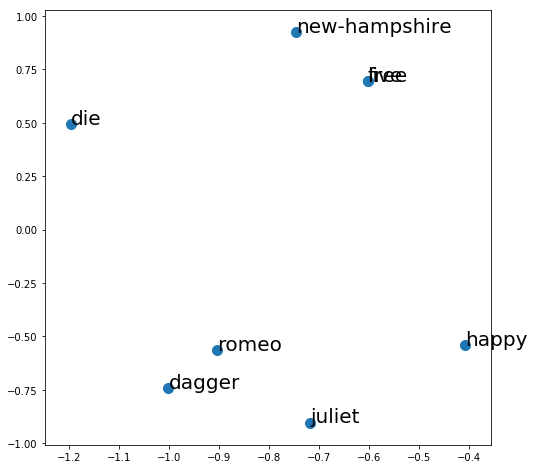

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

words = corpus.keys()

mpl.rcParams['figure.figsize'] = (8, 8)

fig, ax = plt.subplots()

# Scatter
ax.scatter(w_x, w_y, s=100)

# Scatter에 라벨링을 한다.
for i, txt in enumerate(words):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=20)  # free와 live가 겹쳐지는 위치